In [1]:
# Importing core libraries
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer

# Data transformation pipelines
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer, RobustScaler, StandardScaler,MinMaxScaler

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, PReLU
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation, Concatenate
from tensorflow.keras.optimizers  import Adam, Adagrad, SGD
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [3]:
# Importing from Scikit-Learn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FactorAnalysis

from keras.layers import Input, Embedding, Reshape, GlobalAveragePooling1D
from keras.layers import Flatten, concatenate, Concatenate, Lambda, Dropout, SpatialDropout1D
from keras.layers import Activation, LeakyReLU
from keras.models import Model, load_model
from keras.losses import binary_crossentropy

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
link ='https://github.com/analiseb/UB-Masters-Thesis/blob/main/data/CVD_data.csv?raw=true'
df = pd.read_csv(link)
pd.set_option('display.max_columns', None)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,30850-0.0,30780-0.0,30690-0.0,30790-0.0,23101-0.0,23099-0.0,48-0.0,23100-0.0,30710-0.0,30760-0.0,30640-0.0,30750-0.0,49-0.0,30770-0.0,30740-0.0,30630-0.0,30870-0.0,21001-0.0,1488-0.0,4079-0.0,1299-0.0,21003-0.0,1160-0.0,1438-0.0,4080-0.0,1458-0.0,1528-0.0,1319-0.0,845-0.0,1289-0.0,1309-0.0,1418-0.0,1329-0.0,1220-0.0,1428-0.0,1249-0.0,1349-0.0,1369-0.0,20117-0.0,2100-0.0,2654-0.0,1339-0.0,21000-0.0,2050-0.0,1408-0.0,1200-0.0,1538-0.0,31-0.0,6138-0.0,1359-0.0,1389-0.0,1478-0.0,2090-0.0,1508-0.0,1379-0.0,6142-0.0,1468-0.0,1548-0.0,1239-0.0,1448-0.0,hypertension,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_myocardial_infarction,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,multi-labels,age,gender,race
0,0.50800,3.88800,6.47700,65.1984,45.2,35.6,74.0,25.0,0.34,1.70600,1.21100,35.065,102.0,26.339,5.62200,1.59300,0.97700,24.5790,6.0,77.0,10.0,54.0,7.0,10.0,110.0,3.73,2.0,0.0,23.52,6.0,2.0,3,2,0,0,1,1,1,2,1,6,2,0,2,1,3,2,0,1,2,1,1,1,3,1,1,3,2,0,3,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]",54,Female,British
1,13.08800,3.52000,5.51200,15.4000,74.6,36.5,120.0,42.9,3.94,1.17300,1.01900,40.900,113.0,10.701,5.05200,1.39000,2.35800,35.0861,2.0,91.0,2.0,65.0,9.0,12.0,166.0,7.00,2.4,0.0,16.00,2.0,1.0,2,2,0,1,1,4,2,2,0,7,2,0,1,3,2,0,1,3,3,1,1,0,2,2,1,5,2,0,1,1,0,1,0,1,0,0,0,0,"[1, 0, 1, 0, 0, 0, 0, 0]",65,Male,British
2,9.73364,4.10892,6.47949,50.8588,71.7,29.7,112.0,30.3,3.88,1.58546,1.22432,84.100,107.0,18.763,13.71763,1.74423,2.78764,30.7934,0.0,99.0,2.0,55.0,7.0,10.0,135.0,7.00,2.0,0.0,21.00,3.0,1.0,2,1,0,0,1,2,1,2,0,7,2,0,1,2,2,1,1,3,3,2,1,0,2,2,1,4,2,0,3,1,0,1,0,0,0,1,1,1,"[0, 0, 1, 0, 0, 1, 1, 1]",55,Male,British
3,1.78800,2.88700,5.56500,56.5183,40.2,29.8,67.0,17.0,0.87,2.11500,0.81000,36.400,91.0,31.672,4.82700,1.89100,1.15700,20.7577,0.0,71.0,5.0,49.0,8.0,14.0,116.0,5.00,3.0,1.0,18.00,5.0,1.0,2,2,0,0,4,1,2,2,0,7,2,2,1,2,1,2,0,6,2,2,1,0,2,2,1,3,2,0,3,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]",49,Female,Irish
4,0.75600,2.67000,4.68000,4.7700,46.5,30.1,85.0,20.0,0.18,1.49300,0.73300,34.200,105.0,42.209,5.06300,1.86900,1.67700,25.9766,7.0,73.0,4.0,61.0,7.0,2.0,113.0,7.00,4.0,2.0,16.00,3.0,3.0,3,2,1,1,4,1,1,2,0,7,3,0,1,3,1,0,0,3,3,1,2,0,1,1,1,4,2,0,3,1,0,0,0,1,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]",61,Female,British


In [9]:
outcomes = ['outcome_myocardial_infarction','outcome_cardiomyopathies','outcome_ischemic_heart_disease','outcome_heart_failure','outcome_peripheral_vascular_disease','outcome_cardiac_arrest','outcome_cerebral_infarction','outcome_arrhythmia']

# classifying features by datatype for appropriate use in model
continuous_cols = df.iloc[:,:18].columns.to_list()
numerical_cols = df.iloc[:,18:18+13].columns.to_list()
categorical_cols = df.iloc[:,18+13:18+13+30].columns.to_list() # ordinal encoded
nominal_cats = ['1428-0.0','20117-0.0','2100-0.0','2654-0.0','21000-0.0','1538-0.0','31-0.0','6138-0.0','2090-0.0','1508-0.0','6142-0.0','1468-0.0','1239-0.0','1448-0.0','hypertension']

### transform features & split dataset

In [17]:
def process_features(data, target, norm_method=StandardScaler(), one_hot=True, val=True):
    
    # split data into features and target 
    X = data.iloc[:,:61]
    y = data[target]
    
    # split into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
    
    # scale numerical features
    scaler = norm_method # QuantileTransformer(output_distribution='uniform'), StandardScaler(), MaxMinScaler()
    X_train[continuous_cols+numerical_cols]=scaler.fit_transform(X_train[continuous_cols+numerical_cols])
    X_test[continuous_cols+numerical_cols] = scaler.transform(X_test[continuous_cols+numerical_cols])
    
    # get_dummies on nominal categorical features & drop original cols
    if one_hot:
        join = pd.concat([X_train,X_test],axis=0)
        dummies = pd.get_dummies(join[nominal_cats], columns=nominal_cats, drop_first=True)
        X_train[dummies.columns] = dummies.iloc[:len(X_train),:]
        X_test[dummies.columns] = dummies.iloc[len(X_train):,:]
        X_test = X_test.reindex(columns = X_train.columns, fill_value=0)
        del(dummies)

        X_train.drop(nominal_cats,axis=1,inplace=True)
        X_test.drop(nominal_cats,axis=1,inplace=True)

    if val:
      X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

      return X_train, X_val, X_test, y_train, y_val, y_test

    else:
      return X_train, X_test, y_train, y_test

### Resampling on training data to address class imbalance

In [18]:
from imblearn.over_sampling import ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def resample_data(X_train, y_train, method):
    
    if method=='ADASYN':
        X_temp,y_train= ADASYN().fit_resample(X_train,y_train)
        X_train = pd.DataFrame(X_temp, columns=X_train.columns)
        
    elif method=='over':
        # over sample the majority class in train
        oversample = RandomOverSampler(sampling_strategy='minority',random_state=1)
        X_temp, y_train = oversample.fit_resample(X_train, y_train)
        X_train = pd.DataFrame(X_temp, columns=X_train.columns)

    elif method=='under':
        # under sample the majority class in train
        undersample = RandomUnderSampler(sampling_strategy='majority',random_state=1)
        X_temp, y_train = undersample.fit_resample(X_train, y_train)
        X_train = pd.DataFrame(X_temp, columns=X_train.columns)
        
    elif method=='partial_under':
        # under sample the majority class in train, ~2:1 neg/pos ratio
        undersample_uneven = RandomUnderSampler(sampling_strategy=0.5,random_state=1)
        X_temp, y_train = undersample_uneven.fit_resample(X_train, y_train)
        X_train = pd.DataFrame(X_temp, columns=X_train2.columns)
        
    return X_train, y_train

### Build MLP Model

#### define model metrics

In [19]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#### optimize number of nodes

In [ ]:
def evaluate_nodes(n_nodes, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch):
    
    # define model
    model = Sequential()
    model.add(Dense(100, activation=tf.keras.activations.gelu , input_shape=(X_train.shape[1],)))
    model.add(Dense(n_nodes, activation=tf.keras.activations.gelu ))
    model.add(Dense(n_nodes, activation=tf.keras.activations.gelu ))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=0.000001),
        metrics=['acc',f1_m,precision_m, recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [ ]:
def evaluate_layers(n_layers, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch):
    
    # define model
    model = Sequential()
    model.add(Dense(100, activation=tf.keras.activations.gelu , input_shape=(X_train.shape[1],)))
    for _ in range(1,n_layers):
        model.add(Dense(50, activation=tf.keras.activations.gelu ))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=0.000001),
        metrics=['acc',f1_m,precision_m, recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [20]:
def plot_history(history):
    fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

    ax1.set_title("Loss")
    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["Test Loss", "Validation Loss"])
    ax1.set_xlabel ("Epoch")

    ax2.set_title("Accuracy")
    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["Test Accuracy", "Validation Accuracy"])
    ax2.set_xlabel ("Epoch")

    ax3.set_title("Recall")
    ax3.plot(history.history["recall_m"])
    ax3.plot(history.history["val_recall_m"])
    ax3.legend(["Test Recall", "Validation Recall"])
    ax3.set_xlabel ("Epoch")

    ax4.set_title("F1")
    ax4.plot(history.history["f1_m"])
    ax4.plot(history.history["val_f1_m"])
    ax4.legend(["Test F1-score", "Validation F1-score"])
    ax4.set_xlabel ("Epoch")

#### test range of input nodes

In [ ]:
num_nodes = [10, 25, 50, 100, 150, 200]
epochs = 400
batch = 500

X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia', QuantileTransformer(output_distribution='uniform'), one_hot=True)
X_train, y_train= resample_data(X_train, y_train, 'under')

save_history = pd.DataFrame()
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, result = evaluate_nodes(n_nodes, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch)
    save_history['loss_'+str(n_nodes)]=history.history["loss"]
    save_history['acc_'+str(n_nodes)]=history.history["acc"]
    save_history['f1'+str(n_nodes)]=history.history["f1_m"]
    save_history['recall'+str(n_nodes)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_nodes, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    plot_history(history)
    plt.suptitle('Number of Nodes: '+str(n_nodes))

In [30]:
def plot_compare(data, metric):
  labels = []
  for i in range(data.shape[1]):
    sns.lineplot(x=data.index, y=data.loc[:,data.columns[i-1]], data=data)
    plt.title(metric+' for all num_nodes')
    labels.append(str(data.columns[i-1]))
  plt.legend(title=metric, loc='best', labels=labels)


In [ ]:
plot_compare(save_history.loc[:,save_history.columns.to_list()[::4]], 'loss')

In [ ]:
plot_compare(save_history.loc[:,save_history.columns.to_list()[1::4]], 'accuracy')

In [ ]:
plot_compare(save_history.loc[:,save_history.columns.to_list()[2::4]], 'F1-Score')

In [ ]:
plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

In [ ]:
num_layers = [3, 4, 5]
epochs = 400
batch = 500

X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia', QuantileTransformer(output_distribution='uniform'), one_hot=True)
X_train, y_train= resample_data(X_train, y_train, 'under')

save_history = pd.DataFrame()
for n_layers in num_layers:
    # evaluate model with a given number of nodes
    history, result = evaluate_layers(n_layers, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch)
    save_history['loss_'+str(n_layers)]=history.history["loss"]
    save_history['acc_'+str(n_layers)]=history.history["acc"]
    save_history['f1'+str(n_layers)]=history.history["f1_m"]
    save_history['recall'+str(n_layers)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_layers, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    plot_history(history)
    plt.suptitle('Number of Layers: '+str(n_layers))

### Build Model after testing

In [22]:
def basic_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=SGD, lr=0.000001):
    
    # define model
    model = Sequential()
    model.add(Dense(1000, activation=activation , input_shape=(X_train.shape[1],)))
    model.add(Dense(500, activation=activation))
    model.add(Dense(500, activation=activation ))
    model.add(Dense(200, activation=activation ))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=opt(learning_rate=lr),
        metrics=['acc',f1_m,precision_m, recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [28]:
epochs =300
batch = 400
sample_methods =['ADASYN', 'over', 'under', 'partial_under']
activations=['relu', 'tanh', tf.keras.activations.gelu]
optimizers = [SGD, Adam, Adagrad]
num_transformers = [StandardScaler(), MinMaxScaler(), QuantileTransformer(output_distribution='uniform')]
# test one_hot==True/False

In [ ]:
# Test numerical transformers
save_history = pd.DataFrame()
for param in num_transformers:
    
    X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia', param, one_hot=True)
    X_train, y_train= resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = basic_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=SGD, lr=0.000001)
    save_history['loss_'+str(n_nodes)]=history.history["loss"]
    save_history['acc_'+str(n_nodes)]=history.history["acc"]
    save_history['f1'+str(n_nodes)]=history.history["f1_m"]
    save_history['recall'+str(n_nodes)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

Epoch 1/500
139/139 [==============================] - 4s 21ms/step - loss: 0.7230 - acc: 0.4847 - f1_m: 0.3388 - precision_m: 0.4727 - recall_m: 0.2649 - val_loss: 0.7283 - val_acc: 0.4751 - val_f1_m: 0.3410 - val_precision_m: 0.4922 - val_recall_m: 0.2618
Epoch 2/500
139/139 [==============================] - 2s 18ms/step - loss: 0.7228 - acc: 0.4845 - f1_m: 0.3404 - precision_m: 0.4732 - recall_m: 0.2668 - val_loss: 0.7281 - val_acc: 0.4746 - val_f1_m: 0.3413 - val_precision_m: 0.4911 - val_recall_m: 0.2624
Epoch 3/500
139/139 [==============================] - 2s 17ms/step - loss: 0.7227 - acc: 0.4847 - f1_m: 0.3420 - precision_m: 0.4731 - recall_m: 0.2687 - val_loss: 0.7279 - val_acc: 0.4749 - val_f1_m: 0.3459 - val_precision_m: 0.4959 - val_recall_m: 0.2664
Epoch 4/500
139/139 [==============================] - 2s 17ms/step - loss: 0.7225 - acc: 0.4847 - f1_m: 0.3437 - precision_m: 0.4730 - recall_m: 0.2707 - val_loss: 0.7277 - val_acc: 0.4750 - val_f1_m: 0.3475 - val_precision_m

In [ ]:
# Test sample methods
save_history = pd.DataFrame()
for param in sample_methods:
    
    X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia')
    X_train, y_train= resample_data(X_train, y_train, param)
    
    # evaluate model with a given number of nodes
    history, result = basic_model(X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch,opt=SGD, lr=0.000001)
    save_history['loss_'+str(n_nodes)]=history.history["loss"]
    save_history['acc_'+str(n_nodes)]=history.history["acc"]
    save_history['f1'+str(n_nodes)]=history.history["f1_m"]
    save_history['recall'+str(n_nodes)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_nodes, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

Epoch 1/500
139/139 [==============================] - 2s 12ms/step - loss: 0.7196 - acc: 0.5023 - f1_m: 0.2960 - precision_m: 0.5003 - recall_m: 0.2302 - val_loss: 0.7078 - val_acc: 0.4942 - val_f1_m: 0.4492 - val_precision_m: 0.5204 - val_recall_m: 0.3959
Epoch 2/500
139/139 [==============================] - 1s 10ms/step - loss: 0.7032 - acc: 0.5071 - f1_m: 0.4886 - precision_m: 0.5075 - recall_m: 0.4731 - val_loss: 0.7019 - val_acc: 0.5067 - val_f1_m: 0.5038 - val_precision_m: 0.5285 - val_recall_m: 0.4821
Epoch 3/500
139/139 [==============================] - 1s 10ms/step - loss: 0.7000 - acc: 0.5124 - f1_m: 0.5103 - precision_m: 0.5124 - recall_m: 0.5096 - val_loss: 0.6987 - val_acc: 0.5145 - val_f1_m: 0.5200 - val_precision_m: 0.5350 - val_recall_m: 0.5067
Epoch 4/500
139/139 [==============================] - 1s 10ms/step - loss: 0.6974 - acc: 0.5182 - f1_m: 0.5173 - precision_m: 0.5182 - recall_m: 0.5178 - val_loss: 0.6960 - val_acc: 0.5233 - val_f1_m: 0.5342 - val_precision_m

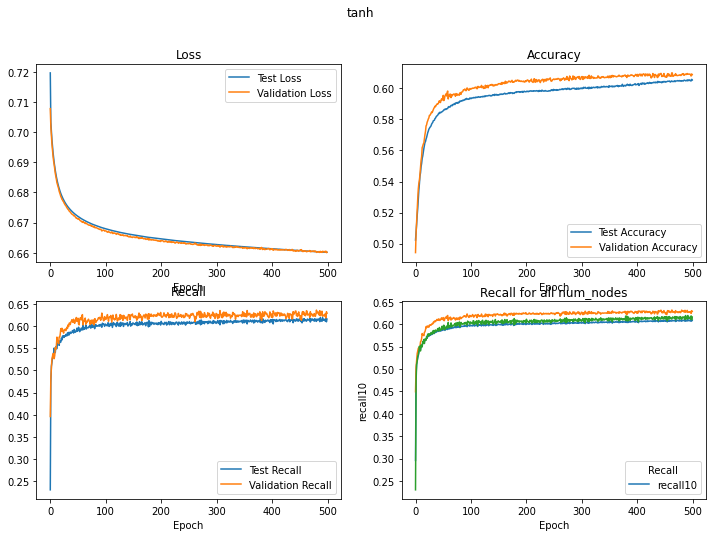

In [ ]:
# Test activations
activations = ['tanh']
save_history = pd.DataFrame()
for param in activations:
    
    X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia')
    X_train, y_train= resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = basic_model(X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation=param,opt=SGD, lr=0.0001) #lr = 0.0002
    save_history['loss_']=history.history["loss"]
    save_history['acc_']=history.history["acc"]
    save_history['f1']=history.history["f1_m"]
    save_history['recall']=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_nodes, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

Epoch 1/300
139/139 [==============================] - 3s 17ms/step - loss: 0.6941 - acc: 0.5228 - f1_m: 0.5463 - precision_m: 0.5221 - recall_m: 0.5851 - val_loss: 0.6857 - val_acc: 0.5525 - val_f1_m: 0.5545 - val_precision_m: 0.5768 - val_recall_m: 0.5347
Epoch 2/300
139/139 [==============================] - 2s 14ms/step - loss: 0.6815 - acc: 0.5602 - f1_m: 0.5656 - precision_m: 0.5589 - recall_m: 0.5767 - val_loss: 0.6778 - val_acc: 0.5748 - val_f1_m: 0.5894 - val_precision_m: 0.5965 - val_recall_m: 0.5836
Epoch 3/300
139/139 [==============================] - 2s 14ms/step - loss: 0.6760 - acc: 0.5756 - f1_m: 0.5812 - precision_m: 0.5732 - recall_m: 0.5913 - val_loss: 0.6732 - val_acc: 0.5912 - val_f1_m: 0.6177 - val_precision_m: 0.6052 - val_recall_m: 0.6325
Epoch 4/300
139/139 [==============================] - 2s 14ms/step - loss: 0.6729 - acc: 0.5819 - f1_m: 0.5862 - precision_m: 0.5799 - recall_m: 0.5951 - val_loss: 0.6703 - val_acc: 0.5970 - val_f1_m: 0.6279 - val_precision_m

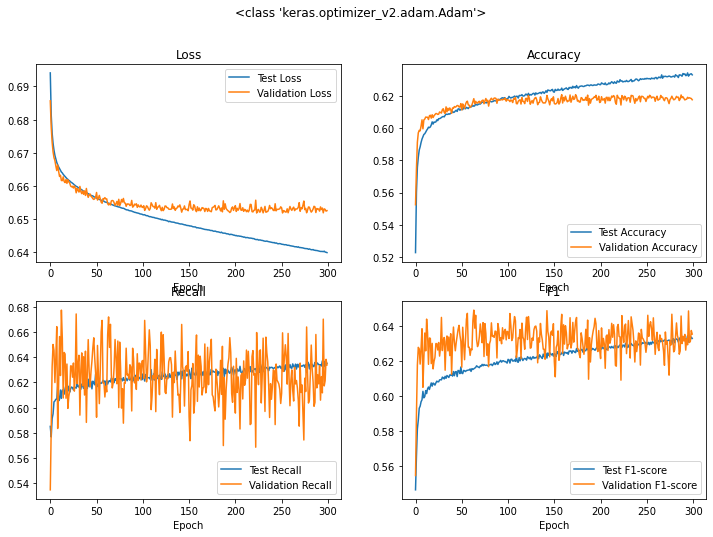

In [35]:
# Test optimizers

optimizers =[Adam]
save_history = pd.DataFrame()
for param in optimizers:
    
    X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia')
    X_train, y_train= resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = basic_model(X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=param, lr=0.000002)
    save_history['loss_']=history.history["loss"]
    save_history['acc_']=history.history["acc"]
    save_history['f1']=history.history["f1_m"]
    save_history['recall']=history.history["recall_m"]


    # summarize final test set accuracy
    print('loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    plot_history(history)
    plt.suptitle(str(param))


In [34]:
result

[0.6564041972160339,
 0.6129032373428345,
 0.6192384362220764,
 0.6456099152565002,
 0.6078640222549438]

#### Learning Rate Schedulers

In [ ]:
# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [ ]:
# Test opt opt params

learning_rates = [1e-3, 1e-4, 1e-6, some_changing_thing()]
beta1, beta2 = [1,2,3,4], [1,2,3,4]
save_history = pd.DataFrame()
for param in optimizers:
    
    X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia', QuantileTransformer(output_distribution='uniform'), one_hot=True)
    X_train, y_train= resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = basic_model(n_nodes, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='relu',opt=param, lr=0.000001)
    save_history['loss_'+str(n_nodes)]=history.history["loss"]
    save_history['acc_'+str(n_nodes)]=history.history["acc"]
    save_history['f1'+str(n_nodes)]=history.history["f1_m"]
    save_history['recall'+str(n_nodes)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_nodes, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

### Build MLP Model with Embeddings

In [ ]:
def build_categorical_inputs(features):

    initial_inputs = {}
    cat_input_layers={}
    
    train_test_cat_features = pd.concat([X_train[categorical_cols], X_test[categorical_cols]])
    
    for feature in features:
        no_of_unique_cats  = train_test_cat_features[feature].nunique()
        embedding_size = int(min(np.ceil((no_of_unique_cats)/2), 50))
        categories  = no_of_unique_cats + 1

        initial_inputs[feature] = Input(shape=(1,))
        embedding_layer = Embedding(categories, 
                                    embedding_size,
                                    embeddings_regularizer=regularizers.l2(0.01),
                                    input_length=1)(initial_inputs[feature])
        cat_input_layers[feature] = Reshape(target_shape=(embedding_size,))(embedding_layer)

    return initial_inputs, cat_input_layers

In [ ]:
def build_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch):
    
    models = []
    for categorical_var in categorical_cols :
        model = Sequential()
        no_of_unique_cat  = X_train[categorical_var].nunique()
        embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
        embedding_size = int(embedding_size)
        vocab  = no_of_unique_cat+1
        model.add( Embedding(vocab ,embedding_size, input_length = 1 ))
        model.add(Reshape(target_shape=(embedding_size,)))
        models.append( model )
        
    model_rest = Sequential()
    model_rest.add(Dense(16, input_dim= X_train[numerical_cols+continuous_cols].shape[1]))
    models.append(model_rest)

    full_model = Sequential()
    full_model.add(Concatenate(models))
    full_model.add(Dense(1000))
    full_model.add(Activation('relu'))
    full_model.add(Dense(400))
    full_model.add(Activation('relu'))
    full_model.add(Dense(1))
    full_model.add(Activation('sigmoid'))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=0.000001),
        metrics=['acc',f1_m,precision_m, recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [ ]:
def build_model( X_train, X_val, X_test ,y_train, y_val, y_test, epochs, batch):
    
    # define model
    model = Sequential()
    for col in categorical_cols:
        no_of_unique_cat  = X_train[col].nunique()
        embedding_size = min(np.ceil((no_of_unique_cat)/2), 50)
        embedding_size = int(embedding_size)
        vocab  = no_of_unique_cat+1
        model.add(Embedding(input_dim=no_of_unique_cat, output_dim=embedding_size, input_shape=(X_train.shape[1],)))
    model.add(Flatten())

    model.add(Dense(50, activation=tf.keras.activations.gelu ))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=0.000001),
        metrics=['acc',f1_m,precision_m, recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia', QuantileTransformer(output_distribution='uniform'), one_hot=False)
X_train, y_train= resample_data(X_train, y_train, 'under')
model=build_model(X_train, X_val, X_test ,y_train, y_val, y_test, 400, 600)

Epoch 1/400


ValueError: in user code:

    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\layers\reshaping\reshape.py", line 111, in _fix_unknown_dimension
        raise ValueError(msg)

    ValueError: Exception encountered when calling layer "reshape_149" (type Reshape).
    
    total size of new array must be unchanged, input_shape = [61, 1], output_shape = [1]
    
    Call arguments received by layer "reshape_149" (type Reshape):
      • inputs=tf.Tensor(shape=(None, 61, 1), dtype=float32)


In [ ]:
initial_inputs, input_layers = build_categorical_inputs(categorical_cols)

no_of_num_features = len(X_train.columns) - len(categorical_cols)

initial_inputs['numerical_features'] = Input(shape=(no_of_num_features,))
input_layers['numerical_features'] = initial_inputs['numerical_features']

inputs = Concatenate(axis=-1)([layer for layer in input_layers.values()])

In [ ]:
models = []

model_rest = Sequential()
model_rest.add(Dense(100, input_dim= len(numerical_cols+continuous_cols) ))
models.append(model_rest)

for categorical_var in categorical_cols :
     
    model = Sequential()
    no_of_unique_cat  = X_train[categorical_var].nunique()
    
    # jeremy howard rule
    embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
    embedding_size = int(embedding_size)
    vocab  = no_of_unique_cat+1
    model.add( Embedding(vocab ,embedding_size, input_length = 1 ))
    model.add(Reshape(target_shape=(embedding_size,)))
    models.append( model )


full_model = Sequential()
full_model.add(Concatenate(models))
full_model.add(Dense(1000))
full_model.add(Activation('relu'))
full_model.add(Dense(400))
full_model.add(Activation('relu'))
full_model.add(Dense(200))
full_model.add(Activation('sigmoid'))
full_model.add(Dense(1))
full_model.add(Activation('sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
batch=1000
epochs=100
# fit model on train set
history = model.fit(
    X_train, y_train,
    batch_size=batch,
    epochs=epochs,
#     shuffle=True,
    verbose=1,
    validation_data=(X_val, y_val),
)
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\layers\reshaping\reshape.py", line 111, in _fix_unknown_dimension
        raise ValueError(msg)

    ValueError: Exception encountered when calling layer "reshape_603" (type Reshape).
    
    total size of new array must be unchanged, input_shape = [61, 1], output_shape = [1]
    
    Call arguments received by layer "reshape_603" (type Reshape):
      • inputs=tf.Tensor(shape=(None, 61, 1), dtype=float32)


### K-fold cross validation

In [ ]:
# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(no_classes, activation='softmax'))

    # Compile the model
    model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

### Save Model